# Course Project: Trading Strategy based on PCA

Welcome to your course project. This exercise gives you a hands-on experience to use PCA to:

- construct eigen-portfolios
- implement a measure of market systemic risk
- develop simple trading strategy

**Instructions:**
- You will be using Python 3.
- Avoid using for-loops and while-loops, unless you are explicitly told to do so.
- Do not modify the (# GRADED FUNCTION [function name]) comment in some cells. Your work would not be graded if you change this. Each cell containing that comment should only contain one function.
- After coding your function, run the cell right below it to check if your result is correct.

**After this assignment you will:**
- Be able to use PCA to construct eigen-portfolios
- Be able to use PCA to calculate a measure of market systemic risk
- Be able to implement and analyze performance of portfolio strategy

Let's get started!

## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. You only need to write code between the ### START CODE HERE ### and ### END CODE HERE ### comments. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run Cell" (denoted by a play symbol) in the upper bar of the notebook.

We will often specify "(≈ X lines of code)" in the comments to tell you about how much code you need to write. It is just a rough estimate, so don't feel bad if your code is longer or shorter.

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](http://pandas.pydata.org/) Python data analysis library
- [pandas](http://scikit-learn.org/stable/) scikit-learn - machine learning in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [28]:
import pandas as pd
import numpy as np
import sklearn.decomposition
import tensorflow as tf
from tensorflow.keras.layers import Dense
import sys
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

print("Package Versions:")
print("  scikit-learn: %s" % sklearn.__version__)
print("  tensorflow: %s" % tf.__version__)

sys.path.append("..")
sys.path.append('./')
import grading

try:
    import sklearn.model_selection
    import sklearn.linear_model
except:
    print("Looks like an older version of sklearn package")

try:
    import pandas as pd
    print("  pandas: %s"% pd.__version__)
except:
    print("Missing pandas package")

ERROR: Could not find a version that satisfies the requirement tensorflow==1.14 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==1.14


ValueError: Tensorflow 1 is unsupported in Colab.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

In [4]:
### ONLY FOR GRADING. DO NOT EDIT ###
submissions=dict()
assignment_key="LztgGBBtEeiaYgrsftMrjA"
all_parts=["oZXnf", "ahjZa", "9tUbW","wjLiO"]
### ONLY FOR GRADING. DO NOT EDIT ###

In [5]:
# COURSERA_TOKEN = # the key provided to the Student under his/her email on submission page
# COURSERA_EMAIL = # the email
COURSERA_TOKEN="BJXQuhwVPU0ARFKN"
COURSERA_EMAIL="rajatvarna@gmail.com"

#### Dataset:  daily prices of  stocks from S&P 500 index  ####
For this exercise we will be working with S&P 500 Index stock prices dataset.
The following cell computes returns based for a subset of S&P 500 index stocks. It starts with stocks price data:

In [8]:
import os
# load dataset

asset_prices = pd.read_csv('./spx_holdings_and_spx_closeprice.csv',
                     date_parser=lambda dt: pd.to_datetime(dt, format='%Y-%m-%d'),
                     index_col = 0).dropna()
n_stocks_show = 12
print('Asset prices shape', asset_prices.shape)
asset_prices.iloc[:, :n_stocks_show].head()

Asset prices shape (1099, 419)


<ipython-input-8-4d818b6ddf46>:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  asset_prices = pd.read_csv('./spx_holdings_and_spx_closeprice.csv',


,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP
2000-01-27,46.1112,78.9443,3.9286,4.5485,13.7898,15.6719,48.0313,10.8844,39.5477,8.1250,32.9375,33.5625
2000-01-28,45.8585,77.8245,3.6295,4.5485,14.2653,14.3906,47.7500,10.7143,38.5627,7.7188,32.3125,33.0000
2000-01-31,44.5952,78.0345,3.7054,4.3968,14.5730,13.7656,46.7500,10.6576,37.3807,7.6406,32.5625,33.5000
2000-02-01,47.8377,80.7640,3.5804,4.5333,14.7128,13.9688,49.0000,10.8844,37.9717,7.9219,32.5625,33.6875
2000-02-02,51.5434,83.4934,3.5290,4.5788,14.7968,15.3281,48.1250,10.6576,35.9032,7.9688,32.5625,33.6250


### Calculate daily log-returns

In [9]:
asset_returns = np.log(asset_prices) - np.log(asset_prices.shift(1))
asset_returns = asset_prices.pct_change(periods=1)
asset_returns = asset_returns.iloc[1:, :]
asset_returns.iloc[:, :n_stocks_show].head()

,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP
2000-01-28,-0.005480,-0.014185,-0.076134,0.000000,0.034482,-0.081758,-0.005857,-0.015628,-0.024907,-0.049994,-0.018975,-0.016760
2000-01-31,-0.027548,0.002698,0.020912,-0.033352,0.021570,-0.043431,-0.020942,-0.005292,-0.030651,-0.010131,0.007737,0.015152
2000-02-01,0.072710,0.034978,-0.033735,0.031045,0.009593,0.014761,0.048128,0.021281,0.015810,0.036816,0.000000,0.005597
2000-02-02,0.077464,0.033795,-0.014356,0.010037,0.005709,0.097310,-0.017857,-0.020837,-0.054475,0.005920,0.000000,-0.001855
2000-02-03,0.016340,-0.031014,0.045537,-0.006617,0.005670,0.126402,0.098701,0.000000,0.067217,0.035288,0.011516,0.033457


In [10]:
def center_returns(r_df):
    """
    Normalize, i.e. center and divide by standard deviation raw asset returns data

    Arguments:
    r_df -- a pandas.DataFrame of asset returns

    Return:
    normed_df -- normalized returns
    """
    mean_r = r_df.mean(axis=0)
    sd_r = r_df.std(axis=0)
    normed_df = (r_df - mean_r) / sd_r
    return normed_df

In [11]:
normed_r = center_returns(asset_returns)
normed_r.iloc[:, :n_stocks_show].head()

,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP
2000-01-28,-0.124486,-0.550277,-2.046104,-0.053508,1.644872,-1.901871,-0.153983,-0.871184,-1.183387,-1.552039,-1.434518,-0.743326
2000-01-31,-0.616970,0.094280,0.553959,-1.315415,1.018436,-1.024292,-0.493360,-0.315002,-1.455093,-0.346610,0.549547,0.655780
2000-02-01,1.620484,1.326648,-0.910135,1.121135,0.437383,0.308163,1.060485,1.114889,0.742377,1.073061,-0.025118,0.236876
2000-02-02,1.726588,1.281470,-0.390941,0.326250,0.248961,2.198299,-0.423952,-1.151500,-2.581854,0.138776,-0.025118,-0.089859
2000-02-03,0.362470,-1.192799,1.213715,-0.303888,0.247061,2.864432,2.198196,-0.030236,3.173721,1.026829,0.830261,1.458369


Now we are ready to compute Absorption Ratio(AR). We do so by defining a moving look back window over which we collect returns for computing PCA. We start off from the earliest historical data and march forward moving by step_size, which we also choose arbitrary. For each such window we compute PCA and AR, fixing in advance number of components in the enumerator. Specifically, for we use the following hyper-parameters:

#### Part 1 (Implement exponentially-weighted)

**Instructions:**
Implement exponent_weighting function which returns a sequence of $w_j$ as np.array. See below:

Define sequence of $X_j$ where $j \subset [N, 0]$, an integer taking all values in the interval from 0 to N  $$ X_j =  e^{-\frac{log(2)}{H} \times  \space j}$$
where H is half-life which determines the speed of decay, and $log$ is natural log function
Then a sequence of exponentially decaying weights $w_j$ is defined as $$ w_j = \frac{X_j}{ \sum\limits_{j=0}^N X_j } $$

In [12]:
# GRADED FUNCTION: exponent_weighting# GRADE
def exponent_weighting(n_periods, half_life = 252):
    """
    Calculate exponentially smoothed normalized (in probability density function sense) weights

    Arguments:
    n_periods -- number of periods, an integer, N in the formula above
    half_life -- half-life, which determines the speed of decay, h in the formula

    Return:
    exp_probs -- exponentially smoothed weights, np.array
    """

    exp_probs = np.zeros(n_periods) # do your own calculation instead of dummy zero array
    ### START CODE HERE ### (≈ 3 lines of code)
    ### ...
    # Calculate the sequence Xj
    Xj = np.exp(-np.log(2) / half_life * np.arange(n_periods))

    # Normalize the sequence to get the weights wj
    exp_probs = Xj / np.sum(Xj)

    return exp_probs
    ### END CODE HERE ###

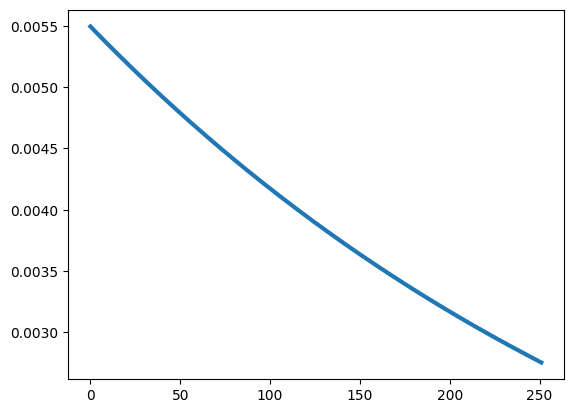

In [13]:
exp_probs = exponent_weighting(252*1)
plt.plot(exp_probs, linewidth=3)

In [14]:
### GRADED PART (DO NOT EDIT) ###
part_1=list(exp_probs[:100])
try:
    part1 = " ".join(map(repr, part_1))
except TypeError:
    part1 = repr(part_1)
submissions[all_parts[0]]=part1
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:1],all_parts,submissions)
exp_probs[:100]
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


array([0.00549361, 0.00547852, 0.00546347, 0.00544846, 0.0054335 ,
       0.00541857, 0.00540369, 0.00538885, 0.00537404, 0.00535928,
       0.00534456, 0.00532988, 0.00531524, 0.00530064, 0.00528608,
       0.00527156, 0.00525708, 0.00524264, 0.00522824, 0.00521388,
       0.00519956, 0.00518528, 0.00517103, 0.00515683, 0.00514267,
       0.00512854, 0.00511445, 0.0051004 , 0.00508639, 0.00507242,
       0.00505849, 0.00504459, 0.00503074, 0.00501692, 0.00500314,
       0.0049894 , 0.00497569, 0.00496202, 0.00494839, 0.0049348 ,
       0.00492125, 0.00490773, 0.00489425, 0.00488081, 0.0048674 ,
       0.00485403, 0.0048407 , 0.0048274 , 0.00481414, 0.00480092,
       0.00478773, 0.00477458, 0.00476146, 0.00474838, 0.00473534,
       0.00472233, 0.00470936, 0.00469643, 0.00468353, 0.00467066,
       0.00465783, 0.00464504, 0.00463228, 0.00461956, 0.00460687,
       0.00459421, 0.00458159, 0.00456901, 0.00455646, 0.00454394,
       0.00453146, 0.00451901, 0.0045066 , 0.00449422, 0.00448

In [15]:
def absorption_ratio(explained_variance, n_components):
    """
    Calculate absorption ratio via PCA. absorption_ratio() is NOT to be used with Auto-Encoder.

    Arguments:
    explained_variance -- 1D np.array of explained variance by each pricincipal component, in descending order

    n_components -- an integer, a number of principal components to compute absorption ratio

    Return:
    ar -- absorption ratio
    """
    ar = np.sum(explained_variance[:n_components]) / np.sum(explained_variance)
    return ar

#### Part 2 (Implement Linear Auto-Encoder)

LinearAutoEncoder class has two fully connected layers and no activation functions between the layers.

**Instructions:**
- fill missing code within LinearAutoEncoder class
- in init() method of LinearAutoEncoder setup neural network
    - **self.codings_layer** is a fully connected layer with **n_codings** neurons and no activation function
    - **self.outputs** is a fully connected layer with **n_outputs** neurons and no activation function
    - define loss function as Mean Square Error between the outputs and inputs referenced by **self.X** in the code
    - use AdamOptimizer to optimize model parameters

In [24]:
tf.compat.v1.disable_eager_execution()

def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    tf.random.set_seed(seed)
    np.random.seed(seed)

class LinearAutoEncoder:
    """
    To perform simple PCA, we set activation_fn=None
    i.e., all neurons are linear and the cost function is the Mean-Square Error (MSE)
    """
    def __init__(self, n_inputs, n_codings, learning_rate=0.01):
        self.learning_rate = learning_rate
        n_outputs = n_inputs
        self.destroy()
        reset_graph()

        # the inputs are n_inputs x n_inputs covariance matrices
        self.X = tf.compat.v1.placeholder(tf.float32, shape=[None, n_inputs, n_inputs])

        with tf.name_scope("lin_ae"):
            self.codings_layer = None
            self.outputs = None
            ### START CODE HERE ### (≈ 2 lines of code)
            self.codings_layer = tf.keras.layers.Dense(n_codings)
            self.outputs = tf.keras.layers.Dense(n_outputs)
            ### END CODE HERE ###

        with tf.name_scope("loss"):
            self.reconstruction_loss = None
            self.training_op = None
            ### START CODE HERE ### (≈ 4-5 lines of code)
            self.reconstruction_loss = tf.keras.losses.MeanSquaredError(self.X, self.outputs)
            self.training_op = tf.compat.v1.train.AdamOptimizer(self.learning_rate).minimize(self.reconstruction_loss)
            self.init = tf.compat.v1.global_variables_initializer()

    def destroy(self):
        if hasattr(self, 'sess') and self.sess is not None:
            self.sess.close()
            self.sess = None

    def absorption_ratio(self, test_input):
        """
        Calculate absorption ratio based on already trained model
        """
        if self.outputs is None:
            return test_input, 0.

        with self.sess.as_default():  # do not close session
            codings = self.codings_layer.eval(feed_dict={self.X: test_input})

            # calculate variance explained ratio
            result_ = self.outputs.eval(feed_dict={self.X: test_input})
            var_explained = np.sum(np.diag(result_.squeeze())) / np.sum(np.diag(test_input.squeeze()))

        return codings[0, :, :], var_explained

    def next_batch(self, X_train, batch_size):
        """
        X_train - np.array of double of size K x N x N, where N is dimensionality of the covariance matrix
        batch_size - an integer, number of training examples to feed through the nwtwork at once
        """
        y_batch = None

        selected_idx = np.random.choice(tuple(range(X_train.shape[0])), size=batch_size)
        X_batch = X_train[selected_idx, :, :]
        return X_batch, y_batch

    def train(self, X_train, X_test, n_epochs=5, batch_size=2, verbose=False):
        """
        train simple auto-encoder network
        :param X_train:
        :param X_test:
        :param n_epochs: number of epochs to use for training the model
        :param batch_size:
        :return:
        """
        if self.outputs is None:
            return X_test, 0.

        n_examples = len(X_train)  # number of training examples
        self.sess = tf.compat.v1.Session()

        # as_default context manager does not close the session when you exit the context,
        # and you must close the session explicitly.
        with self.sess.as_default():
            self.init.run()
            for epoch in range(n_epochs):
                n_batches = n_examples // min(n_examples, batch_size)
                for _ in range(n_batches):
                    X_batch, y_batch = self.next_batch(X_train, batch_size)
                    self.sess.run(self.training_op, feed_dict={self.X: X_batch})

                if verbose:
                    # last covariance matrix from the training sample
                    if X_train.shape[0] == 1:
                        mse_train = self.reconstruction_loss.eval(feed_dict={self.X: X_train})
                    else:
                        mse_train = self.reconstruction_loss.eval(feed_dict={self.X: np.array([X_train[-1, :, :]])})
                    mse_test = self.reconstruction_loss.eval(feed_dict={self.X: X_test})
                    print('Epoch %d. MSE Train %.4f, MSE Test %.4f' % (epoch, mse_train, mse_test))

            # calculate variance explained ratio
            test_input = np.array([X_train[-1, :, :]])
            result_ = self.outputs.eval(feed_dict={self.X: test_input})
            var_explained = np.sum(np.diag(result_.squeeze())) / np.sum(np.diag(test_input.squeeze()))
            # print('Linear Auto-Encoder: variance explained: %.2f' % var_explained)

            codings = self.codings_layer.eval(feed_dict={self.X: X_test})
            # print('Done training linear auto-encoder')

        return codings[0, :, :], var_explained

In [25]:
### GRADED PART (DO NOT EDIT) ###
ix_offset = 1000
stock_tickers = asset_returns.columns.values[:-1]
assert 'SPX' not in stock_tickers, "By accident included SPX index"

step_size = 60
num_samples = 5
lookback_window = 252 * 2   # in (days)
num_assets = len(stock_tickers)
cov_matricies = np.zeros((num_samples, num_assets, num_assets)) # hold training data

# collect training and test data
ik = 0
for ix in range(ix_offset, min(ix_offset + num_samples * step_size, len(normed_r)), step_size):
    ret_frame = normed_r.iloc[ix_offset - lookback_window:ix_offset, :-1]
    print("time index and covariance matrix shape", ix, ret_frame.shape)
    cov_matricies[ik, :, :] = ret_frame.cov()
    ik += 1

# the last covariance matrix determines the absorption ratio
lin_ae = LinearAutoEncoder(n_inputs=num_assets, n_codings=200)
np.array([cov_matricies[-1, :, :]]).shape
lin_codings, test_absorp_ratio = lin_ae.train(cov_matricies[ : int((2/3)*num_samples), :, :],
                                                np.array([cov_matricies[-1, :, :]]),
                                                n_epochs=10,
                                                batch_size=5)
lin_codings, in_sample_absorp_ratio = lin_ae.absorption_ratio(np.array([cov_matricies[0, :, :]]))
### GRADED PART (DO NOT EDIT) ###

time index and covariance matrix shape 1000 (504, 418)
time index and covariance matrix shape 1060 (504, 418)


ValueError: Invalid value for argument `reduction`. Expected one of {'sum_over_batch_size', 'none', 'sum', None}. Received: reduction=Tensor("Placeholder:0", shape=(None, 418, 418), dtype=float32)

In [ ]:
### GRADED PART (DO NOT EDIT) ###
part_2=[test_absorp_ratio, in_sample_absorp_ratio]
try:
    part2 = " ".join(map(repr, part_2))
except TypeError:
    part2 = repr(part_2)
submissions[all_parts[1]]=part2
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:2],all_parts,submissions)
[test_absorp_ratio, in_sample_absorp_ratio]
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


[0.39359208195496026, 0.39359208195496026]

In [ ]:
stock_tickers = asset_returns.columns.values[:-1]
assert 'SPX' not in stock_tickers, "By accident included SPX index"

half_life = 252             # in (days)
lookback_window = 252 * 2   # in (days)
num_assets = len(stock_tickers)
step_size = 1          # days : 5 - weekly, 21 - monthly, 63 - quarterly

# require of that much variance to be explained. How many components are needed?
var_threshold = 0.8

# fix 20% of principal components for absorption ratio calculation. How much variance do they explain?
absorb_comp = int((1 / 5) * num_assets)

print('Half-life = %d' % half_life)
print('Lookback window = %d' % lookback_window)
print('Step size = %d' % step_size)
print('Variance Threshold = %d' % var_threshold)
print('Number of stocks = %d' % num_assets)
print('Number of principal components = %d' % absorb_comp)

Half-life = 252
Lookback window = 504
Step size = 1
Variance Threshold = 0
Number of stocks = 418
Number of principal components = 83


In [ ]:
# indexes date on which to compute PCA
days_offset = 4 * 252
num_days = 6 * 252 + days_offset
pca_ts_index = normed_r.index[list(range(lookback_window + days_offset, min(num_days, len(normed_r)), step_size))]

# allocate arrays for storing absorption ratio
pca_components = np.array([np.nan]*len(pca_ts_index))
absorp_ratio = np.array([np.nan]*len(pca_ts_index))
lae_ar = np.array([np.nan]*len(pca_ts_index))  # absorption ratio computed by Auto-Encoder

# keep track of covariance matricies as we would need them for training Auto-Encoder
buf_size = 5
cov_matricies = np.zeros((buf_size, num_assets, num_assets))

exp_probs = exponent_weighting(lookback_window, half_life)
assert 'SPX' not in normed_r.iloc[:lookback_window, :-1].columns.values, "By accident included SPX index"

**Instructions:**
- on each loop iteration:
    - fit PCA to **cov_mat**
    - use fitted pca model to pass values to absorption_ratio(). The result of absorption ratio calculation goes into **absorp_ratio**
    - compute number of principal components it takes to explain at least **var_threshold** of variance. The result of this calculation goes into **pca_components**

In [ ]:
# run the main loop computing PCA and absorption at each step using moving window of returns
# run this loop using both exponentially weighted returns and equally weighted returns
import time

ik = 0
use_ewm = False
lin_ae = None
time_start = time.time()
for ix in range(lookback_window + days_offset, min(num_days, len(normed_r)), step_size):
    ret_frame = normed_r.iloc[ix - lookback_window:ix, :-1]  # fixed window
    # ret_frame = normed_r.iloc[:ix, :-1]  # ever-growing window
    if use_ewm:
        ret_frame = (ret_frame.T * exp_probs).T

    cov_mat = ret_frame.cov()
    circ_idx = ik % buf_size
    cov_matricies[circ_idx, :, :] = cov_mat.values

    if ik == 0 or ik % 21 == 0:
        ### START CODE HERE ### (≈ 4-5 lines of code)
        ### fit PCA, compute absorption ratio by calling absorption_ratio()
        ### store result into pca_components for grading
        pca_fit = sklearn.decomposition.PCA().fit(cov_mat)
        pca_components[ik] = np.sum(np.cumsum(pca_fit.explained_variance_ratio_)<= var_threshold)
        absorp_ratio[ik] = absorption_ratio(pca_fit.explained_variance_, absorb_comp)
        ### END CODE HERE ###
    else:
        absorp_ratio[ik] = absorp_ratio[ik-1]
        pca_components[ik] = pca_components[ik-1]

    if ik == 0 or ik % 252 == 0:
        if lin_ae is not None:
            lin_ae.destroy()

        print('Trainging AE', normed_r.index[ix])
        lin_ae = LinearAutoEncoder(cov_mat.shape[0], absorb_comp)
        lin_codings, lae_ar[ik] = lin_ae.train(cov_matricies[:circ_idx + 1, :, :], np.array([cov_mat.values]),batch_size=2)
    else:
        lin_codings, lae_ar[ik] = lin_ae.absorption_ratio(np.array([cov_mat.values]))

    ik += 1

print ('Absorption Ratio done! Time elapsed: {} seconds'.format(time.time() - time_start))
ts_pca_components = pd.Series(pca_components, index=pca_ts_index)
ts_absorb_ratio = pd.Series(absorp_ratio, index=pca_ts_index)
ts_lae_absorb_ratio = pd.Series(lae_ar, index=pca_ts_index)

Trainging AE 2006-02-07 00:00:00
Trainging AE 2007-02-09 00:00:00
Trainging AE 2008-02-11 00:00:00


In [ ]:
ts_absorb_ratio.plot(figsize=(12,6), title='Absorption Ratio via PCA', linewidth=3)
plt.savefig("Absorption_Ratio_SPX.png", dpi=900)

In [ ]:
ts_lae_absorb_ratio.plot(figsize=(12,6), title='Absorption Ratio via Auto-Encoder', linewidth=3)

Having computed daily (this means the step size is 1) Absorption Ratio times series, we further follow M. Kritzman to make use of AR to define yet another measure: AR Delta. In particular:
$$ AR\delta = \frac{AR_{15d} - AR_{1y}}{ AR\sigma_{1y}}$$
We use  $AR\delta$ to build simple portfolio trading strategy

In [ ]:
# following Kritzman and computing AR_delta = (15d_AR -1yr_AR) / sigma_AR
ts_ar = ts_absorb_ratio
ar_mean_1yr = ts_ar.rolling(252).mean()
ar_mean_15d = ts_ar.rolling(15).mean()
ar_sd_1yr = ts_ar.rolling(252).std()
ar_delta = (ar_mean_15d - ar_mean_1yr) / ar_sd_1yr    # standardized shift in absorption ratio

df_plot = pd.DataFrame({'AR_delta': ar_delta.values, 'AR_1yr': ar_mean_1yr.values, 'AR_15d': ar_mean_15d.values},
                       index=ts_ar.index)
df_plot = df_plot.dropna()
if df_plot.shape[0] > 0:
    df_plot.plot(figsize=(12, 6), title='Absorption Ratio Delta', linewidth=3)

#### Part 3 (AR Delta Trading Strategy)

**Instructions:** Implement get_weight() function

The AR Delta trading strategy forms a portfolio of EQ and FI, following these simple rules:

* __$ -1\sigma < AR < +1\sigma $__	 50 / 50 weights for EQ / FI
* __$ AR > +1\sigma $__	             0 / 100 weights for EQ / FI
* __$ AR < -1\sigma $__	             100 / 0 weights for EQ / FI

Here we compute AR Delta strategy weights using data from the same data set. As expected, the average number of trades per year is very low.

In [ ]:
# GRADED FUNCTION: get_weight
def get_weight(ar_delta):
    '''
    Calculate EQ / FI portfolio weights based on Absorption Ratio delta
    Arguments:
    ar_delta -- Absorption Ratio delta

    Return:
        wgts -- a vector of portfolio weights
    '''

    ### START CODE HERE ### (≈ 6 lines of code)
    ### ....
    if ar_delta > 1:
        wgts = [0.0, 1.0]  # 0% EQ, 100% FI
    elif ar_delta < -1:
        wgts = [1.0, 0.0]  # 100% EQ, 0% FI
    else:
        wgts = [0.5, 0.5]  # 50% EQ, 50% FI

    return wgts
    ### END CODE HERE ###

In [ ]:
### GRADED PART (DO NOT EDIT) ###
ar_delta_data = ar_delta[251:]

rebal_dates = np.zeros(len(ar_delta_data))
wgts = pd.DataFrame(data=np.zeros((len(ar_delta_data.index), 2)), index=ar_delta_data.index, columns=('EQ', 'FI'))

prtf_wgts = get_weight(ar_delta_data.values[0])
wgts.iloc[0, :] = prtf_wgts
for ix in range(1, len(ar_delta_data)):
    prtf_wgts = get_weight(ar_delta_data.values[ix])
    wgts.iloc[ix, :] = prtf_wgts
    if wgts.iloc[ix-1, :][0] != prtf_wgts[0]:
        prtf_wgts = wgts.iloc[ix, :]
        rebal_dates[ix] = 1

ts_rebal_dates = pd.Series(rebal_dates, index=ar_delta_data.index)
ts_trades_per_year = ts_rebal_dates.groupby([ts_rebal_dates.index.year]).sum()
print('Average number of trades per year %.2f' % ts_trades_per_year.mean())
### GRADED PART (DO NOT EDIT) ###

In [ ]:
### GRADED PART (DO NOT EDIT) ###
np.random.seed(42)
wgts_test = wgts.as_matrix()
idx_row = np.random.randint(low=0, high=wgts_test.shape[0], size=100)
np.random.seed(42)
idx_col = np.random.randint(low=0, high=wgts_test.shape[1], size=100)

# grading
part_3=list(wgts_test[idx_row, idx_col])
try:
    part3 = " ".join(map(repr, part_3))
except TypeError:
    part3 = repr(part_3)
submissions[all_parts[2]]=part3
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:3],all_parts,submissions)

wgts_test[idx_row, idx_col]
### GRADED PART (DO NOT EDIT) ###

Now that weights have been determined, run the re-balancing strategy using time series of returns and compute
 - sharpe of the strategy
 - strategy annualized return
 - strategy annualized volatility

Contrast this with 50 / 50 Equity / Fixed Income ETF strategy performance using the same performance metrics. Use VTI as Equity and AGG as Fixed Income assets.

In [ ]:
etf_r= pd.read_csv('/home/jovyan/work/readonly/pca_hw5_etf_returns.csv',
                     date_parser=lambda dt: pd.to_datetime(dt, format='%Y-%m-%d'),
                     index_col = 0)
etf_prices = pd.read_csv('/home/jovyan/work/readonly/millenials_portfolio_etfs.csv',
                         date_parser=lambda dt: pd.to_datetime(dt, format='%Y-%m-%d'),
                         index_col = 0)
etf_returns = etf_prices.pct_change(periods=1)
etf_returns = etf_returns.iloc[1450:, :]
etf_r.head()

#### Part 4 (Calculate performance of backtested strategy)

**Instructions:**

Implement function backtest_strategy which given a DataFrame of strategy weights and a DataFrame asset returns annualized return, volatility and Sharpe ratio of a strategy.

In [ ]:
# GRADED FUNCTION: backtest_strategy
def backtest_strategy(strat_wgts, asset_returns, periods_per_year = 252):
    '''
    Calculate portfolio returns and return portfolio strategy performance
    Arguments:

    strat_wgts -- pandas.DataFrame of weights of the assets
    asset_returns -- pandas.DataFrame of asset returns
    periods_per_year -- number of return observations per year

    Return:
        (ann_ret, ann_vol, sharpe) -- a tuple of (annualized return, annualized volatility, sharpe ratio)
    '''

    ### START CODE HERE ### (≈ 10 lines of code)

    # Calculate daily portfolio returns
    portfolio_returns = (strat_wgts * asset_returns).sum(axis=1)

    # Calculate annualized return
    ann_ret = portfolio_returns.mean() * periods_per_year

    # Calculate annualized volatility
    ann_vol = portfolio_returns.std() * (periods_per_year ** 0.5)

    # Calculate Sharpe ratio
    sharpe = ann_ret / ann_vol

    return ann_ret, ann_vol, sharpe
    ### END CODE HERE ###

In [ ]:
### GRADED PART (DO NOT EDIT) ###
ann_ret, ann_vol, sharpe = backtest_strategy(wgts, etf_r)
print('Absorption Ratio strategy:', ann_ret, ann_vol, sharpe)

eq_wgts = wgts.copy()
eq_wgts.iloc[:, ] = 0.5
ann_ret_eq_wgt, ann_vol_eq_wgt, sharpe_eq_wgt = backtest_strategy(eq_wgts, etf_r)
print('Equally weighted:', ann_ret_eq_wgt, ann_vol_eq_wgt, sharpe_eq_wgt)
### GRADED PART (DO NOT EDIT) ###

In [ ]:
### GRADED PART (DO NOT EDIT) ###
part_4=[ann_ret, ann_vol, sharpe, ann_ret_eq_wgt, ann_vol_eq_wgt, sharpe_eq_wgt]
try:
    part4 = " ".join(map(repr, part_4))
except TypeError:
    part3 = repr(part_4)
submissions[all_parts[3]]=part4
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:4],all_parts,submissions)
[ann_ret, ann_vol, sharpe, ann_ret_eq_wgt, ann_vol_eq_wgt, sharpe_eq_wgt]
### GRADED PART (DO NOT EDIT) ###